In [1]:
import pandas as pd
import numpy as np

In [2]:
#LOAD DATASET
df = pd.read_csv(r"E:\prep\Delinquency_prediction_dataset.csv")
df.head()

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
0,CUST0001,56,165580.0,398.0,0.390502,3,0,16310.0,0.317396,EMP,18,Student,Los Angeles,Late,Late,Missed,Late,Missed,Late
1,CUST0002,69,100999.0,493.0,0.312444,6,1,17401.0,0.196093,Self-employed,0,Standard,Phoenix,Missed,Missed,Late,Missed,On-time,On-time
2,CUST0003,46,188416.0,500.0,0.359930,0,0,13761.0,0.301655,Self-employed,1,Platinum,Chicago,Missed,Late,Late,On-time,Missed,Late
3,CUST0004,32,101672.0,413.0,0.371400,3,0,88778.0,0.264794,Unemployed,15,Platinum,Phoenix,Late,Missed,Late,Missed,Late,Late
4,CUST0005,60,38524.0,487.0,0.234716,2,0,13316.0,0.510583,Self-employed,11,Standard,Phoenix,Missed,On-time,Missed,Late,Late,Late


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_ID           500 non-null    object 
 1   Age                   500 non-null    int64  
 2   Income                461 non-null    float64
 3   Credit_Score          498 non-null    float64
 4   Credit_Utilization    500 non-null    float64
 5   Missed_Payments       500 non-null    int64  
 6   Delinquent_Account    500 non-null    int64  
 7   Loan_Balance          471 non-null    float64
 8   Debt_to_Income_Ratio  500 non-null    float64
 9   Employment_Status     500 non-null    object 
 10  Account_Tenure        500 non-null    int64  
 11  Credit_Card_Type      500 non-null    object 
 12  Location              500 non-null    object 
 13  Month_1               500 non-null    object 
 14  Month_2               500 non-null    object 
 15  Month_3               5

In [4]:
df.isnull().sum()

Customer_ID              0
Age                      0
Income                  39
Credit_Score             2
Credit_Utilization       0
Missed_Payments          0
Delinquent_Account       0
Loan_Balance            29
Debt_to_Income_Ratio     0
Employment_Status        0
Account_Tenure           0
Credit_Card_Type         0
Location                 0
Month_1                  0
Month_2                  0
Month_3                  0
Month_4                  0
Month_5                  0
Month_6                  0
dtype: int64

In [5]:
df.drop_duplicates()

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
0,CUST0001,56,165580.0,398.0,0.390502,3,0,16310.0,0.317396,EMP,18,Student,Los Angeles,Late,Late,Missed,Late,Missed,Late
1,CUST0002,69,100999.0,493.0,0.312444,6,1,17401.0,0.196093,Self-employed,0,Standard,Phoenix,Missed,Missed,Late,Missed,On-time,On-time
2,CUST0003,46,188416.0,500.0,0.359930,0,0,13761.0,0.301655,Self-employed,1,Platinum,Chicago,Missed,Late,Late,On-time,Missed,Late
3,CUST0004,32,101672.0,413.0,0.371400,3,0,88778.0,0.264794,Unemployed,15,Platinum,Phoenix,Late,Missed,Late,Missed,Late,Late
4,CUST0005,60,38524.0,487.0,0.234716,2,0,13316.0,0.510583,Self-employed,11,Standard,Phoenix,Missed,On-time,Missed,Late,Late,Late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,CUST0496,71,48307.0,688.0,0.486522,2,0,12707.0,0.373033,retired,9,Business,Phoenix,On-time,On-time,Missed,On-time,On-time,Late
496,CUST0497,60,86180.0,836.0,0.608174,2,1,45595.0,0.291943,Unemployed,18,Student,Houston,On-time,On-time,Late,Late,Late,Missed
497,CUST0498,54,152326.0,847.0,0.676950,0,0,44449.0,0.104839,Employed,16,Student,Phoenix,On-time,Late,Late,On-time,Late,Missed
498,CUST0499,50,105852.0,343.0,0.700643,2,1,11155.0,0.236477,Employed,11,Student,Phoenix,Late,On-time,Late,Missed,On-time,Missed


In [6]:
#BEFORE REPLACE

df["Employment_Status"].unique()


array(['EMP', 'Self-employed', 'Unemployed', 'employed', 'Employed',
       'retired'], dtype=object)

In [7]:
#HANDLING MISSING VALUES

df['Employment_Status'] = df['Employment_Status'].replace({
    'employed': 'Employed',
    'EMP': 'Employed',
    'retired': 'Retired'
})

# AFTER REPLACE

print("unique employment status:", df["Employment_Status"].unique())

unique employment status: ['Employed' 'Self-employed' 'Unemployed' 'Retired']


In [12]:
df['Income']= df['Income'].fillna(df['Income'].median())
df['Income']

0      165580.0
1      100999.0
2      188416.0
3      101672.0
4       38524.0
         ...   
495     48307.0
496     86180.0
497    152326.0
498    105852.0
499     40945.0
Name: Income, Length: 500, dtype: float64

In [14]:
df['Loan_Balance'] = df['Loan_Balance'].fillna(df['Loan_Balance'].mean())
df['Credit_Score'] = df['Credit_Score'].fillna(df['Credit_Score'].median())
df['Loan_Balance']
df['Credit_Score']

0      398.0
1      493.0
2      500.0
3      413.0
4      487.0
       ...  
495    688.0
496    836.0
497    847.0
498    343.0
499    442.0
Name: Credit_Score, Length: 500, dtype: float64

In [15]:
print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
Customer_ID             0
Age                     0
Income                  0
Credit_Score            0
Credit_Utilization      0
Missed_Payments         0
Delinquent_Account      0
Loan_Balance            0
Debt_to_Income_Ratio    0
Employment_Status       0
Account_Tenure          0
Credit_Card_Type        0
Location                0
Month_1                 0
Month_2                 0
Month_3                 0
Month_4                 0
Month_5                 0
Month_6                 0
dtype: int64


In [16]:
print(df.describe())

              Age         Income  Credit_Score  Credit_Utilization  \
count  500.000000     500.000000    500.000000          500.000000   
mean    46.266000  108323.586000    577.750000            0.491446   
std     16.187629   51523.389667    168.543244            0.197103   
min     18.000000   15404.000000    301.000000            0.050000   
25%     33.000000   67610.500000    418.750000            0.356486   
50%     46.500000  107658.000000    586.000000            0.485636   
75%     59.250000  152572.250000    725.750000            0.634440   
max     74.000000  199943.000000    847.000000            1.025843   

       Missed_Payments  Delinquent_Account  Loan_Balance  \
count       500.000000          500.000000    500.000000   
mean          2.968000            0.160000  48654.428875   
std           1.946935            0.366973  28528.573640   
min           0.000000            0.000000    612.000000   
25%           1.000000            0.000000  24847.000000   
50%      

In [17]:
df.dropna(subset=['Credit_Score'], inplace=True)

In [18]:
# 3. Feature Engineering (Creating New Insights)
# Insight 1: Convert text payment history to a numeric 'Risk Score'
# Map: On-time=0, Late=1, Missed=2

status_map = {'On-time': 0, 'Late': 1, 'Missed': 2}
month_cols = ['Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6']

for col in month_cols:
    # Create new numeric columns like 'Month_1_Num'
    df[col + '_Num'] = df[col].map(status_map)

# Sum these up to get a 'Recent_Risk_Score'

df['Recent_Risk_Score'] = df[[col + '_Num' for col in month_cols]].sum(axis=1)

# Insight 2: High Utilization Flag
# Create a flag for customers using > 80% of their credit

df['High_Utilization'] = (df['Credit_Utilization'] > 0.8).astype(int)

# Check the result

print("New columns added:", df.columns)
df.head()

New columns added: Index(['Customer_ID', 'Age', 'Income', 'Credit_Score', 'Credit_Utilization',
       'Missed_Payments', 'Delinquent_Account', 'Loan_Balance',
       'Debt_to_Income_Ratio', 'Employment_Status', 'Account_Tenure',
       'Credit_Card_Type', 'Location', 'Month_1', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6', 'Month_1_Num', 'Month_2_Num',
       'Month_3_Num', 'Month_4_Num', 'Month_5_Num', 'Month_6_Num',
       'Recent_Risk_Score', 'High_Utilization'],
      dtype='object')


,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,...,Month_5,Month_6,Month_1_Num,Month_2_Num,Month_3_Num,Month_4_Num,Month_5_Num,Month_6_Num,Recent_Risk_Score,High_Utilization
0,CUST0001,56,165580.0,398.0,0.390502,3,0,16310.0,0.317396,Employed,...,Missed,Late,1,1,2,1,2,1,8,0
1,CUST0002,69,100999.0,493.0,0.312444,6,1,17401.0,0.196093,Self-employed,...,On-time,On-time,2,2,1,2,0,0,7,0
2,CUST0003,46,188416.0,500.0,0.359930,0,0,13761.0,0.301655,Self-employed,...,Missed,Late,2,1,1,0,2,1,7,0
3,CUST0004,32,101672.0,413.0,0.371400,3,0,88778.0,0.264794,Unemployed,...,Late,Late,1,2,1,2,1,1,8,0
4,CUST0005,60,38524.0,487.0,0.234716,2,0,13316.0,0.510583,Self-employed,...,Late,Late,2,0,2,1,1,1,7,0


In [20]:
# Save the cleaned dataset

df.to_csv('cleaned_delinquency_dataset.csv', index=False)
print("File saved successfully!")

File saved successfully!


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# Set the visual style for graphs
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load the CLEAN dataset from Task 1
# Note: Make sure the file path matches where you saved it
df = pd.read_csv(r"D:\Deliquency Prediction Project\Task-1-Data-Wrangling\output\cleaned_delinquency_dataset.csv")

print("✅ Data Loaded Successfully!")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
df.head()

✅ Data Loaded Successfully!
Rows: 500, Columns: 27


,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,...,Month_5,Month_6,Month_1_Num,Month_2_Num,Month_3_Num,Month_4_Num,Month_5_Num,Month_6_Num,Recent_Risk_Score,High_Utilization
0,CUST0001,56,165580.0,398.0,0.390502,3,0,16310.0,0.317396,Employed,...,Missed,Late,1,1,2,1,2,1,8,0
1,CUST0002,69,100999.0,493.0,0.312444,6,1,17401.0,0.196093,Self-employed,...,On-time,On-time,2,2,1,2,0,0,7,0
2,CUST0003,46,188416.0,500.0,0.359930,0,0,13761.0,0.301655,Self-employed,...,Missed,Late,2,1,1,0,2,1,7,0
3,CUST0004,32,101672.0,413.0,0.371400,3,0,88778.0,0.264794,Unemployed,...,Late,Late,1,2,1,2,1,1,8,0
4,CUST0005,60,38524.0,487.0,0.234716,2,0,13316.0,0.510583,Self-employed,...,Late,Late,2,0,2,1,1,1,7,0


✅ Output folder is set to: D:\Deliquency Prediction Project\Task-2-EDA-SQL\output
✅ Image saved successfully at: D:\Deliquency Prediction Project\Task-2-EDA-SQL\output\1_Delinquency_Count.png


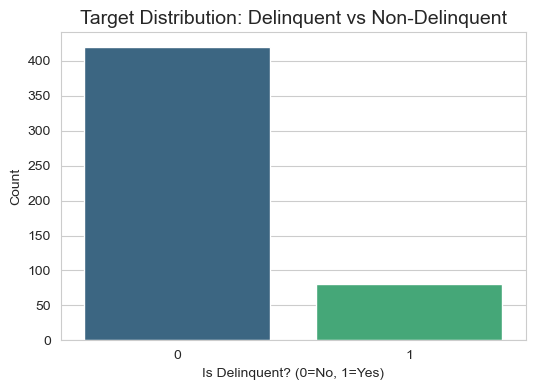

In [5]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# --- STEP 1: Define Your Folders Explicitly ---
# We use 'r' before the string to handle backslashes correctly
base_path = r"D:\Deliquency Prediction Project\Task-2-EDA-SQL"
output_folder = os.path.join(base_path, "output")

# This creates the folder if it doesn't exist (Safety Check)
os.makedirs(output_folder, exist_ok=True)

print(f"✅ Output folder is set to: {output_folder}")

# --- STEP 2: Plotting ---
plt.figure(figsize=(6, 4))

# Fixed the warning by adding hue and legend=False
sns.countplot(x='Delinquent_Account', data=df, hue='Delinquent_Account', legend=False, palette='viridis')

plt.title('Target Distribution: Delinquent vs Non-Delinquent', fontsize=14)
plt.xlabel('Is Delinquent? (0=No, 1=Yes)')
plt.ylabel('Count')

# --- STEP 3: Save using the Full Path ---
save_path = os.path.join(output_folder, '1_Delinquency_Count.png')
plt.savefig(save_path)

print(f"✅ Image saved successfully at: {save_path}")
plt.show()

In [6]:
# Create a local SQL database in memory
conn = sqlite3.connect(':memory:')
df.to_sql('delinquency_db', conn, index=False, if_exists='replace')

def run_sql(query):
    return pd.read_sql_query(query, conn)

print("--- 📊 SQL BUSINESS INSIGHTS ---")

# Q1: What is the overall delinquency rate?
q1 = """
SELECT 
    COUNT(*) as Total_Customers,
    SUM(Delinquent_Account) as Total_Delinquents,
    (SUM(Delinquent_Account) * 100.0 / COUNT(*)) as Delinquency_Rate_Percent
FROM delinquency_db;
"""
print("\nQ1: Overall Delinquency Rate")
display(run_sql(q1))

# Q2: Average Credit Score & Income by Employment Status
q2 = """
SELECT Employment_Status, 
       COUNT(*) as Count, 
       ROUND(AVG(Credit_Score),0) as Avg_Score, 
       ROUND(AVG(Income),0) as Avg_Income
FROM delinquency_db
GROUP BY Employment_Status
ORDER BY Avg_Score DESC;
"""
print("\nQ2: Risk Profile by Job Type")
display(run_sql(q2))

# Q3: Who are the Top 5 Riskiest Customers? (High Debt + Low Credit Score)
q3 = """
SELECT Customer_ID, Credit_Score, Debt_to_Income_Ratio, Delinquent_Account
FROM delinquency_db
WHERE Credit_Score < 600
ORDER BY Debt_to_Income_Ratio DESC
LIMIT 5;
"""
print("\nQ3: Top 5 High-Risk Customers")
display(run_sql(q3))

# Q4: Does credit card type affect delinquency?
q4 = """
SELECT Credit_Card_Type, 
       SUM(Delinquent_Account) as Delinquencies,
       COUNT(*) as Total,
       (SUM(Delinquent_Account)*100.0 / COUNT(*)) as Risk_Percentage
FROM delinquency_db
GROUP BY Credit_Card_Type
ORDER BY Risk_Percentage DESC;
"""
print("\nQ4: Risk by Card Type")
display(run_sql(q4))

--- 📊 SQL BUSINESS INSIGHTS ---

Q1: Overall Delinquency Rate


,Total_Customers,Total_Delinquents,Delinquency_Rate_Percent
0,500,80,16.0



Q2: Risk Profile by Job Type


,Employment_Status,Count,Avg_Score,Avg_Income
0,Self-employed,80,588.0,107173.0
1,Unemployed,93,579.0,109536.0
2,Employed,240,576.0,108046.0
3,Retired,87,571.0,108850.0



Q3: Top 5 High-Risk Customers


,Customer_ID,Credit_Score,Debt_to_Income_Ratio,Delinquent_Account
0,CUST0406,360.0,0.549682,0
1,CUST0383,345.0,0.526571,0
2,CUST0389,550.0,0.522602,0
3,CUST0005,487.0,0.510583,0
4,CUST0378,535.0,0.508127,0



Q4: Risk by Card Type


,Credit_Card_Type,Delinquencies,Total,Risk_Percentage
0,Business,23,108,21.296296
1,Student,20,112,17.857143
2,Gold,17,118,14.406780
3,Standard,11,86,12.790698
4,Platinum,9,76,11.842105


✅ Saving images to: D:\Deliquency Prediction Project\Task-2-EDA-SQL\output
✅ Saved: D:\Deliquency Prediction Project\Task-2-EDA-SQL\output\3_Correlation_Matrix.png


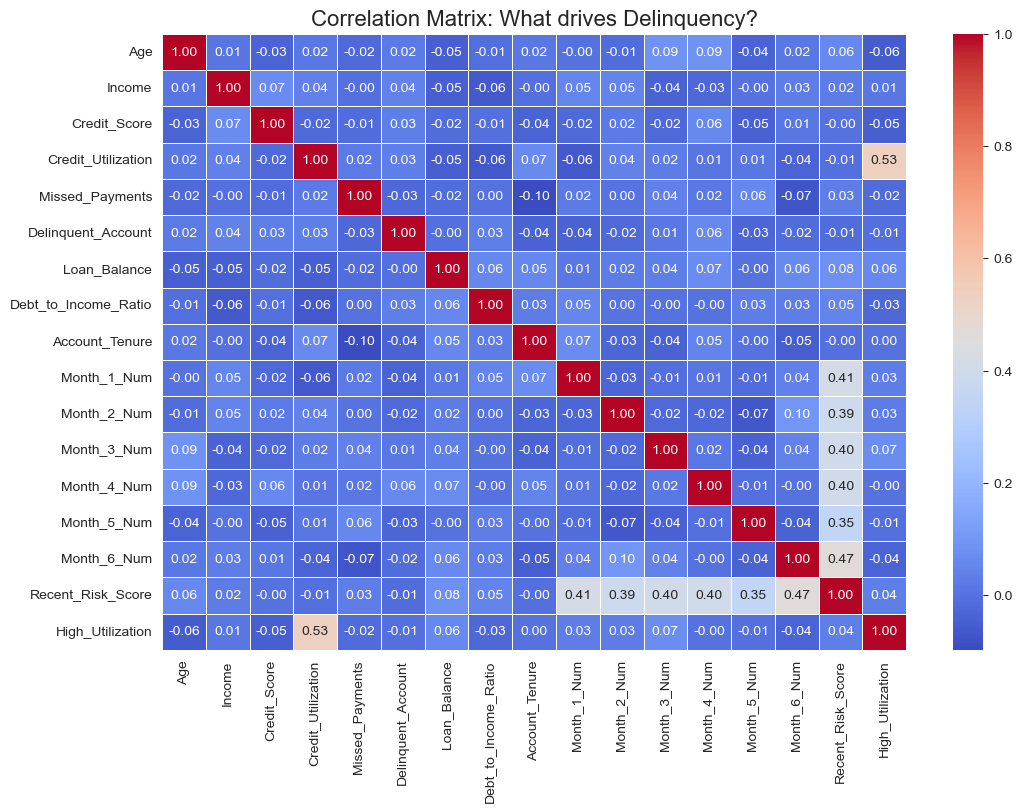

✅ Saved: D:\Deliquency Prediction Project\Task-2-EDA-SQL\output\4_Income_vs_Score.png


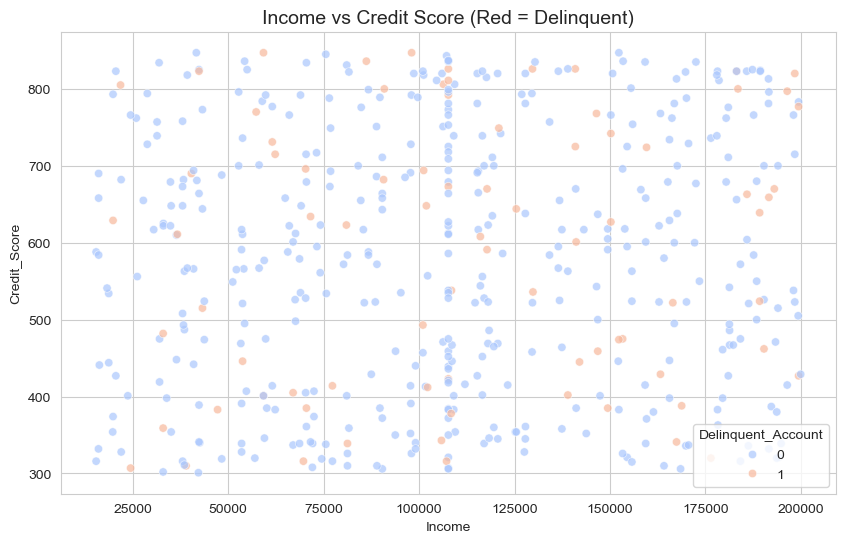

C:\Users\Mopur Shankar Reddy\AppData\Local\Temp\ipykernel_15908\2716424148.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Employment_Status', y='Debt_to_Income_Ratio', data=df, palette='Set2')


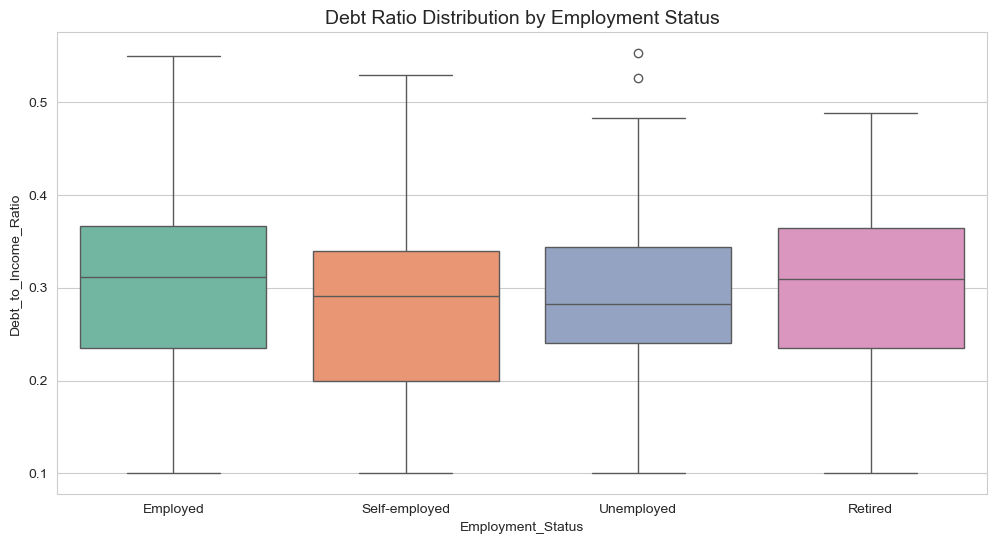

In [8]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# --- STEP 1: Define the Output Folder Explicitly ---
# This ensures Python knows EXACTLY where to go on your D: drive
output_folder = r"D:\Deliquency Prediction Project\Task-2-EDA-SQL\output"

# Create the folder if it doesn't exist (Safety Check)
os.makedirs(output_folder, exist_ok=True)
print(f"✅ Saving images to: {output_folder}")

# --- STEP 2: Multivariate Analysis (Plotting) ---

# A. Correlation Heatmap
plt.figure(figsize=(12, 8))
numeric_cols = df.select_dtypes(include=['number'])

# Plot the heatmap
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix: What drives Delinquency?', fontsize=16)

# Save using the full path
save_path_matrix = os.path.join(output_folder, '3_Correlation_Matrix.png')
plt.savefig(save_path_matrix)
print(f"✅ Saved: {save_path_matrix}")

plt.show()

# B. Scatter Plot: Income vs Credit Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Credit_Score', hue='Delinquent_Account', data=df, alpha=0.7, palette='coolwarm')
plt.title('Income vs Credit Score (Red = Delinquent)', fontsize=14)

# Save using the full path
save_path_scatter = os.path.join(output_folder, '4_Income_vs_Score.png')
plt.savefig(save_path_scatter)
print(f"✅ Saved: {save_path_scatter}")

plt.show()

# C. Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Employment_Status', y='Debt_to_Income_Ratio', data=df, palette='Set2')
plt.title('Debt Ratio Distribution by Employment Status', fontsize=14)
plt.show()